# Imports

In [2]:
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils, optimizers
from PIL import Image
import shutil
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.applications import densenet
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow import convert_to_tensor
import matplotlib.image as mpimg
import pickle

2023-03-10 16:22:21.995786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 16:22:22.274377: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-10 16:22:22.291286: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dolly/.pyenv/versions/3.10.6/envs/YOGi/lib/python3.10/site-packages/cv2/../..

# Create DataFrame

In [3]:
#These variables can be changes, excluding train_dir
train_dir = "../raw_data/Training"
img_height, img_width = 256, 256
batch_size = 32
poses = sorted(os.listdir("../raw_data/Training"))

In [4]:
poses

['Akarna_Dhanurasana',
 'Bharadvaja_s_Twist_Pose',
 'Boat_Pose',
 'Bound_Angle_Pose',
 'Bow_Pose',
 'Bridge_Pose',
 'Camel_Pose',
 'Cat_Cow_Pose',
 'Chair_Pose',
 'Child_Pose',
 'Cobra_Pose',
 'Cockerel_Pose',
 'Corpse_Pose',
 'Cow_Face_Pose',
 'Crane_(Crow)_Pose',
 'Dolphin_Plank_Pose',
 'Dolphin_Pose',
 'Downward_Facing_Dog_Pose',
 'Eagle_Pose',
 'Eight_Angle_Pose',
 'Extended_Puppy_Pose',
 'Extended_Revolved_Side_Angle_Pose',
 'Extended_Revolved_Triangle_Pose',
 'Feathered_Peacock_Pose_or_Pincha_Mayurasana_',
 'Firefly_Pose_or_Tittibhasana_',
 'Fish_Pose_or_Matsyasana_',
 'Four-Limbed_Staff',
 'Frog_Pose_or_Bhekasana',
 'Garland_Pose',
 'Gate_Pose',
 'Half_Lord_of_the_Fishes_Pose_or_Ardha_Matsyendrasana_',
 'Half_Moon_Pose_or_Ardha_Chandrasana_',
 'Handstand_pose_or_Adho_Mukha_Vrksasana_',
 'Happy_Baby_Pose_or_Ananda_Balasana_',
 'Head-to-Knee_Forward_Bend_pose_or_Janu_Sirsasana_',
 'Heron_Pose_or_Krounchasana_',
 'Intense_Side_Stretch_Pose_or_Parsvottanasana_',
 'Legs-Up-the-Wall_P

In [5]:
#Splits into train_generator and validation_generator
#This bulk uploads the images
#Creates target (y) for us!

#Play around with the interpolation argument - bicubic, lanczos??? 

train_datagen = ImageDataGenerator(rescale=1./255,
                                    vertical_flip=True,
                                    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(img_height, img_width),
                                    batch_size=batch_size,
                                    class_mode='categorical',
                                    subset='training',
                                    keep_aspect_ratio=True,
                                    interpolation='lanczos') # set as training data

validation_generator = train_datagen.flow_from_directory(
                                    train_dir, # same directory as training data
                                    target_size=(img_height, img_width),
                                    batch_size=batch_size,
                                    class_mode='categorical',
                                    subset='validation',
                                    keep_aspect_ratio=True,
                                    interpolation='lanczos') # set as validation data

Found 9677 images belonging to 83 classes.
Found 2380 images belonging to 83 classes.


# Training the Model

In [ ]:
...
# Model needs building + transfer learning  
...
def initialize_model():
    base_model = densenet.DenseNet169(
                        include_top=False,
                        weights='imagenet',
                        input_shape=(img_height, img_width, 3),
                        classifier_activation='softmax')
    
    base_model.trainable = True

    model = models.Sequential([ 
        base_model,
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(1000,activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(900, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(800, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(700, activation="relu"),
        layers.Dense(83, activation="softmax")
    ])
    
    
    opt = optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
    return model

In [6]:
model = initialize_model()

2023-03-10 12:50:05.018562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 12:50:06.695876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 12:50:06.697926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 12:50:06.702232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 106496)            0         
                                                                 
 dropout (Dropout)           (None, 106496)            0         
                                                                 
 dense (Dense)               (None, 1000)              106497000 
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 900)               900900    
                                                                 
 dropout_2 (Dropout)         (None, 900)               0

In [9]:
es = EarlyStopping(patience=2, restore_best_weights=True)

In [10]:
#fit model - fit on train_generator (both X and y) and the validation data is validation_generator
history = model.fit(
                train_generator,
                steps_per_epoch = train_generator.samples // batch_size,
                validation_data = validation_generator, 
                validation_steps = validation_generator.samples // batch_size,
                epochs=500,
                callbacks=[es])

Epoch 1/500


/opt/conda/envs/python3106/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2023-03-10 12:51:06.168746: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-10 12:51:22.264237: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x557d69e92420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-10 12:51:22.264281: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-03-10 12:51:22.742297: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-10 12:51:23.991059: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the pro

302/302 [==============================] - ETA: 0s - loss: 4.3463 - accuracy: 0.0434

/opt/conda/envs/python3106/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


302/302 [==============================] - 551s 1s/step - loss: 4.3463 - accuracy: 0.0434 - val_loss: 3.8365 - val_accuracy: 0.1030
Epoch 2/500
302/302 [==============================] - 256s 848ms/step - loss: 3.6304 - accuracy: 0.1203 - val_loss: 3.0631 - val_accuracy: 0.2268
Epoch 3/500
302/302 [==============================] - 261s 861ms/step - loss: 2.8927 - accuracy: 0.2338 - val_loss: 2.3266 - val_accuracy: 0.3881
Epoch 4/500
302/302 [==============================] - 255s 843ms/step - loss: 2.2947 - accuracy: 0.3667 - val_loss: 1.8722 - val_accuracy: 0.4780
Epoch 5/500
302/302 [==============================] - 256s 845ms/step - loss: 1.9083 - accuracy: 0.4585 - val_loss: 1.6530 - val_accuracy: 0.5503
Epoch 6/500
302/302 [==============================] - 255s 842ms/step - loss: 1.6166 - accuracy: 0.5307 - val_loss: 1.4196 - val_accuracy: 0.5997
Epoch 7/500
302/302 [==============================] - 256s 848ms/step - loss: 1.3846 - accuracy: 0.5920 - val_loss: 1.4053 - val_acc

In [27]:
history.history

{'loss': [4.004055500030518,
  2.7326788902282715,
  1.9306105375289917,
  1.4648991823196411,
  1.1824712753295898,
  0.9777507781982422],
 'accuracy': [0.09797822684049606,
  0.30596163868904114,
  0.47662001848220825,
  0.5888025164604187,
  0.6607568860054016,
  0.7120788097381592],
 'val_loss': [2.972832441329956,
  2.0567378997802734,
  1.591464877128601,
  1.4398857355117798,
  1.2371796369552612,
  1.2974331378936768],
 'val_accuracy': [0.26309120655059814,
  0.4607263505458832,
  0.5633445978164673,
  0.6081081032752991,
  0.6710304021835327,
  0.6617398858070374]}

In [100]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
model.save_weights('../saved_models/my_checkpoint')

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

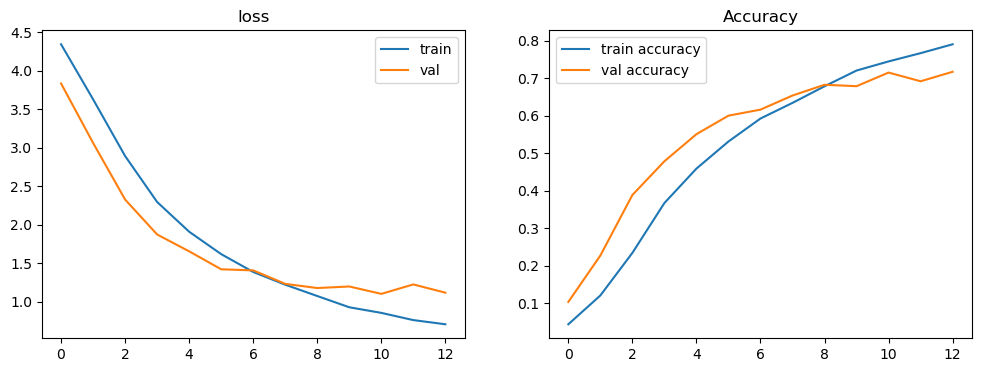

In [101]:
plot_history(history)

# Prediction

In [19]:
test_dir = "../test"

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(
                                    test_dir,
                                    target_size=(img_height, img_width),
                                    batch_size=batch_size,
                                    class_mode='categorical',
                                    subset='training',
                                    keep_aspect_ratio=True,
                                    interpolation='bicubic') # set as training data

Found 1 images belonging to 2 classes.


In [1]:
plt.imshow(mpimg.imread("../test/test/19.jpg"))

NameError: name 'plt' is not defined

1/1 [==============================] - 0s 281ms/step


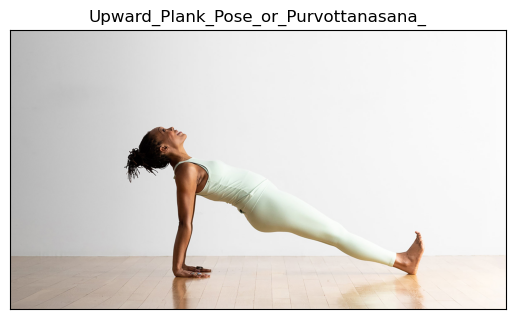

In [22]:
prediction = poses[np.argmax(model.predict(test_generator))]
photo_path = f"../ground_truth/{prediction}.jpeg"
fig = plt.imshow(mpimg.imread(photo_path))
plt.title(prediction)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# Probabilities

In [ ]:
df = pd.DataFrame(poses)
df["probability"] = model.predict(test_generator)[0]

In [ ]:
df[df[0]=="Sitting_pose_1_(normal)"]

# Save models

In [203]:
with open("../saved_models/model_1.pkl", "wb") as file:
    pickle.dump(model, file)



Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......flatten
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_100
...............vars
............activation_101
...............vars
............activation_102
...............vars
............activation_103
...............vars
............activation_104
...............vars
............activation_105
...............vars
............activation_106
...............vars
....

# Open model 
### (if the model has already been fitted!)

In [7]:
model = pickle.load(open("../saved_models/DB_model_1.pkl","rb"))

UnpicklingError: pickle data was truncated